<a href="https://colab.research.google.com/github/gunjanak/Data_Mining/blob/main/Cloud_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 62.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=ac5557c21108a2e65ac06a94cda8d039a80a4685909c646091b596d07e6621e7
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
from pyspark import SparkContext
sc =SparkContext()

In [ ]:
nums= sc.parallelize([1,2,3,4])

In [ ]:
nums.take(1)

[1]

In [ ]:
nums.take(3)

[1, 2, 3]

In [ ]:
squared = nums.map(lambda x: x*x).collect()


In [ ]:
squared

[1, 4, 9, 16]

In [ ]:
from pyspark.sql import Row
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
list_p = [('John',19),('Smith',29),('Adam',35),('Henry',50)]

In [ ]:
rdd = sc.parallelize(list_p)

In [ ]:
output = rdd.map(lambda x: Row(name=x[0], age=int(x[1])))

In [ ]:

list_p = [('John',19),('Smith',29),('Adam',35),('Henry',50)]
rdd = sc.parallelize(list_p)
ppl = rdd.map(lambda x: Row(name=x[0], age=int(x[1])))
DF_ppl = sqlContext.createDataFrame(ppl)

In [ ]:
DF_ppl.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [ ]:
#from pyspark.sql import SQLContext
url = "https://raw.githubusercontent.com/guru99-edu/R-Programming/master/adult_data.csv"
from pyspark import SparkFiles
sc.addFile(url)
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
df = sqlContext.read.csv(SparkFiles.get("adult_data.csv"), header=True, inferSchema= True)

In [ ]:
df.printSchema()

root
 |-- x: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



In [ ]:
df.show(5, truncate = False)

+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|x  |age|workclass|fnlwgt|education   |educational-num|marital-status    |occupation       |relationship|race |gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|1  |25 |Private  |226802|11th        |7              |Never-married     |Machine-op-inspct|Own-child   |Black|Male  |0           |0           |40            |United-States |<=50K |
|2  |38 |Private  |89814 |HS-grad     |9              |Married-civ-spouse|Farming-fishing  |Husband     |White|Male  |0           |0           |50            |United-States |<=50K |
|3  |28 |Local-gov|336951|Assoc-acdm  |12             |Married-civ-spouse|Protective-serv 

#Machine Learning Example with PySpark

Step 1) Basic operation with PySpark

Step 2) Data preprocessing

Step 3) Build a data processing pipeline

Step 4) Build the classifier: logistic

Step 5) Train and evaluate the model

Step 6) Tune the hyperparameter

In [ ]:
from pyspark.sql import SQLContext
url = "https://raw.githubusercontent.com/guru99-edu/R-Programming/master/adult_data.csv"
from pyspark import SparkFiles
sc.addFile(url)
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
#You use inferSchema set to True to tell Spark to guess automatically the type of data. By default, it is turn to False.
df = sqlContext.read.csv(SparkFiles.get("adult_data.csv"), header=True, inferSchema= True)

In [ ]:
df.printSchema()

root
 |-- x: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



In [ ]:
#You can see the data with show.
df.show(5, truncate = False)

+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|x  |age|workclass|fnlwgt|education   |educational-num|marital-status    |occupation       |relationship|race |gender|capital-gain|capital-loss|hours-per-week|native-country|income|
+---+---+---------+------+------------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+
|1  |25 |Private  |226802|11th        |7              |Never-married     |Machine-op-inspct|Own-child   |Black|Male  |0           |0           |40            |United-States |<=50K |
|2  |38 |Private  |89814 |HS-grad     |9              |Married-civ-spouse|Farming-fishing  |Husband     |White|Male  |0           |0           |50            |United-States |<=50K |
|3  |28 |Local-gov|336951|Assoc-acdm  |12             |Married-civ-spouse|Protective-serv 

In [ ]:
#To convert the continuous variable in the right format, you can use recast the columns. 
#You can use withColumn to tell Spark which column to operate the transformation.
# Import all from `sql.types`
from pyspark.sql.types import *

# Write a custom function to convert the data type of DataFrame columns
def convertColumn(df, names, newType):
    for name in names: 
        df = df.withColumn(name, df[name].cast(newType))
    return df 
# List of continuous features
CONTI_FEATURES  = ['age', 'fnlwgt','capital-gain', 'educational-num', 'capital-loss', 'hours-per-week']
# Convert the type
df_string = convertColumn(df, CONTI_FEATURES, FloatType())
# Check the dataset
df_string.printSchema()

root
 |-- x: integer (nullable = true)
 |-- age: float (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: float (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: float (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: float (nullable = true)
 |-- capital-loss: float (nullable = true)
 |-- hours-per-week: float (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)



In [ ]:
#Select columns
df.select('age','fnlwgt').show(5)

+---+------+
|age|fnlwgt|
+---+------+
| 25|226802|
| 38| 89814|
| 28|336951|
| 44|160323|
| 18|103497|
+---+------+
only showing top 5 rows



#Count by group

In [ ]:
df.groupBy("education").count().sort("count",ascending=True).show()

+------------+-----+
|   education|count|
+------------+-----+
|   Preschool|   83|
|     1st-4th|  247|
|     5th-6th|  509|
|   Doctorate|  594|
|        12th|  657|
|         9th|  756|
| Prof-school|  834|
|     7th-8th|  955|
|        10th| 1389|
|  Assoc-acdm| 1601|
|        11th| 1812|
|   Assoc-voc| 2061|
|     Masters| 2657|
|   Bachelors| 8025|
|Some-college|10878|
|     HS-grad|15784|
+------------+-----+



#Describe the data

In [ ]:
df.describe().show()

+-------+------------------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+-----------------+------------------+--------------+------+
|summary|                 x|               age|  workclass|            fnlwgt|   education|   educational-num|marital-status|      occupation|relationship|              race|gender|      capital-gain|     capital-loss|    hours-per-week|native-country|income|
+-------+------------------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+-----------------+------------------+--------------+------+
|  count|             48842|             48842|      48842|             48842|       48842|             48842|         48842|           48842|       48842|             48842| 48842|             48842|            48842|  

In [ ]:
#If you want the summary statistic of only one column, add the name of the column inside describe()
df.describe('capital-gain').show()

+-------+------------------+
|summary|      capital-gain|
+-------+------------------+
|  count|             48842|
|   mean|1079.0676262233324|
| stddev| 7452.019057655413|
|    min|                 0|
|    max|             99999|
+-------+------------------+



#Crosstab computation

In [ ]:
#In some occasion, it can be interesting to see the descriptive statistics between two pairwise columns.
# For instance, you can count the number of people with income below or above 50k by education level. 
#This operation is called a crosstab.
df.crosstab('age', 'income').sort("age_income").show()

+----------+-----+----+
|age_income|<=50K|>50K|
+----------+-----+----+
|        17|  595|   0|
|        18|  862|   0|
|        19| 1050|   3|
|        20| 1112|   1|
|        21| 1090|   6|
|        22| 1161|  17|
|        23| 1307|  22|
|        24| 1162|  44|
|        25| 1119|  76|
|        26| 1068|  85|
|        27| 1117| 115|
|        28| 1101| 179|
|        29| 1025| 198|
|        30| 1031| 247|
|        31| 1050| 275|
|        32|  957| 296|
|        33| 1045| 290|
|        34|  949| 354|
|        35|  997| 340|
|        36|  948| 400|
+----------+-----+----+
only showing top 20 rows



#Step 2) Data preprocessing

In [ ]:
#Add age square

#To add a new feature, you need to:

#Select the column
#Apply the transformation and add it to the DataFrame

from pyspark.sql.functions import *

# 1 Select the column
age_square = df.select(col("age")**2)

# 2 Apply the transformation and add it to the DataFrame
df = df.withColumn("age_square", col("age")**2)

df.printSchema()

root
 |-- x: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- educational-num: integer (nullable = true)
 |-- marital-status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital-gain: integer (nullable = true)
 |-- capital-loss: integer (nullable = true)
 |-- hours-per-week: integer (nullable = true)
 |-- native-country: string (nullable = true)
 |-- income: string (nullable = true)
 |-- age_square: double (nullable = true)



In [ ]:
#You can change the order of the variables with select. Below, you bring age_square right after age.
COLUMNS = ['age', 'age_square', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
           'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
df = df.select(COLUMNS)
df.first()

Row(age=25, age_square=625.0, workclass='Private', fnlwgt=226802, education='11th', educational-num=7, marital-status='Never-married', occupation='Machine-op-inspct', relationship='Own-child', race='Black', gender='Male', capital-gain=0, capital-loss=0, hours-per-week=40, native-country='United-States', income='<=50K')

In [ ]:
#When a group within a feature has only one observation, it brings no information to the model.
# On the contrary, it can lead to an error during the cross-validation.
df.filter(df['native-country'] == 'Holand-Netherlands').count()
df.groupby('native-country').agg({'native-country': 'count'}).sort(asc("count(native-country)")).show()

+--------------------+---------------------+
|      native-country|count(native-country)|
+--------------------+---------------------+
|  Holand-Netherlands|                    1|
|             Hungary|                   19|
|            Honduras|                   20|
|            Scotland|                   21|
|          Yugoslavia|                   23|
|Outlying-US(Guam-...|                   23|
|                Laos|                   23|
|     Trinadad&Tobago|                   27|
|            Cambodia|                   28|
|                Hong|                   30|
|            Thailand|                   30|
|             Ireland|                   37|
|              France|                   38|
|             Ecuador|                   45|
|                Peru|                   46|
|              Greece|                   49|
|           Nicaragua|                   49|
|                Iran|                   59|
|              Taiwan|                   65|
|         

In [ ]:
#The feature native_country has only one household coming from Netherland. You exclude it.
df_remove = df.filter(df['native-country'] !=	'Holand-Netherlands')

In [ ]:
df_remove

DataFrame[age: int, age_square: double, workclass: string, fnlwgt: int, education: string, educational-num: int, marital-status: string, occupation: string, relationship: string, race: string, gender: string, capital-gain: int, capital-loss: int, hours-per-week: int, native-country: string, income: string]

#Step 3) Build a data processing pipeline

In [ ]:
### Example encoder
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

stringIndexer = StringIndexer(inputCol="workclass", outputCol="workclass_encoded")
model = stringIndexer.fit(df)
indexed = model.transform(df)
encoder = OneHotEncoder(dropLast=False, inputCol="workclass_encoded", outputCol="workclass_vec")
ohe = encoder.fit(indexed)
encoded = ohe.transform(indexed)
encoded.show(2)

+---+----------+---------+------+---------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+-----------------+-------------+
|age|age_square|workclass|fnlwgt|education|educational-num|    marital-status|       occupation|relationship| race|gender|capital-gain|capital-loss|hours-per-week|native-country|income|workclass_encoded|workclass_vec|
+---+----------+---------+------+---------+---------------+------------------+-----------------+------------+-----+------+------------+------------+--------------+--------------+------+-----------------+-------------+
| 25|     625.0|  Private|226802|     11th|              7|     Never-married|Machine-op-inspct|   Own-child|Black|  Male|           0|           0|            40| United-States| <=50K|              0.0|(9,[0],[1.0])|
| 38|    1444.0|  Private| 89814|  HS-grad|              9|Married-civ-spouse|  Farming-fishing|     Husband|White|  Male|      

#1. Encode the categorical data

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder
CATE_FEATURES = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
stages = [] # stages in our Pipeline
for categoricalCol in CATE_FEATURES:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],
                                     outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

In [ ]:
# Convert label into label indices using the StringIndexer
label_stringIdx =  StringIndexer(inputCol="income", outputCol="newlabel")
stages += [label_stringIdx]

In [ ]:
assemblerInputs = [c + "classVec" for c in CATE_FEATURES] + CONTI_FEATURES

In [ ]:
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [ ]:
# Create a Pipeline.
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df_remove)
model = pipelineModel.transform(df_remove)

In [ ]:
model.take(1)

[Row(age=25, age_square=625.0, workclass='Private', fnlwgt=226802, education='11th', educational-num=7, marital-status='Never-married', occupation='Machine-op-inspct', relationship='Own-child', race='Black', gender='Male', capital-gain=0, capital-loss=0, hours-per-week=40, native-country='United-States', income='<=50K', workclassIndex=0.0, workclassclassVec=SparseVector(8, {0: 1.0}), educationIndex=5.0, educationclassVec=SparseVector(15, {5: 1.0}), marital-statusIndex=1.0, marital-statusclassVec=SparseVector(6, {1: 1.0}), occupationIndex=6.0, occupationclassVec=SparseVector(14, {6: 1.0}), relationshipIndex=2.0, relationshipclassVec=SparseVector(5, {2: 1.0}), raceIndex=1.0, raceclassVec=SparseVector(4, {1: 1.0}), genderIndex=0.0, genderclassVec=SparseVector(1, {0: 1.0}), native-countryIndex=0.0, native-countryclassVec=SparseVector(40, {0: 1.0}), newlabel=0.0, features=SparseVector(99, {0: 1.0, 13: 1.0, 24: 1.0, 35: 1.0, 45: 1.0, 49: 1.0, 52: 1.0, 53: 1.0, 93: 25.0, 94: 226802.0, 96: 7.0

#Step 4) Build the classifier: logistic

In [ ]:
from pyspark.ml.linalg import DenseVector
input_data = model.rdd.map(lambda x: (x["newlabel"], DenseVector(x["features"])))

In [ ]:
df_train = sqlContext.createDataFrame(input_data, ["label", "features"])

In [ ]:
df_train.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[1.0,0.0,0.0,0.0,...|
|  0.0|[1.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,1.0,0.0,...|
|  1.0|[1.0,0.0,0.0,0.0,...|
|  0.0|[0.0,0.0,0.0,1.0,...|
+-----+--------------------+
only showing top 5 rows



In [ ]:
# Split the data into train and test sets
train_data, test_data = df_train.randomSplit([.8,.2],seed=1234)

In [ ]:
train_data.groupby('label').agg({'label': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|       29701|
|  1.0|        9345|
+-----+------------+



In [ ]:
test_data.groupby('label').agg({'label': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|        7453|
|  1.0|        2342|
+-----+------------+



#Build the logistic regressor

In [ ]:
# Import `LinearRegression`
from pyspark.ml.classification import LogisticRegression

# Initialize `lr`
lr = LogisticRegression(labelCol="label",
                        featuresCol="features",
                        maxIter=50,
                        regParam=0.3)

# Fit the data to the model
linearModel = lr.fit(train_data)

In [ ]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(linearModel.coefficients))
print("Intercept: " + str(linearModel.intercept))

Coefficients: [-0.012146555972181892,-0.06823563484390709,0.02590958887814795,-0.15292581346457462,-0.04483837741960846,0.27970814384565873,0.2464748870588192,-0.4560360553321682,-0.13652228959852042,-0.033154844952308464,0.22625762788031803,0.37015537730881004,0.0037014922138185456,-0.22829348970186258,0.01981154395832007,-0.23459018666764406,-0.2607580062420121,0.5250383820067995,-0.23543487799239662,-0.19113381449917444,0.5107528620548643,-0.2281631871693735,-0.26100468457243037,0.4116055255656633,-0.3111922492519036,-0.1801453770079564,-0.18777591200194854,-0.15922812651196047,-0.15174038909420745,0.24989902742650588,-0.03146520420761662,0.3388611643931061,-0.09526309982245013,0.061293905146205786,-0.25564538748878246,-0.1686925775571202,-0.15344276278298447,-0.06957959747947653,-0.2180319317648546,-0.27540833926695696,0.10549547587073846,0.11078533918028771,-0.2201247623540206,0.3434529975433487,-0.19389566307533013,-0.2796001605822243,-0.213879161420028,0.4479266997937128,0.08265

#Step 5) Train and evaluate the model

In [ ]:
# Make predictions on test data using the transform() method.
predictions = linearModel.transform(test_data)

In [ ]:
predictions.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [ ]:
#You are interested by the label, prediction and the probability
selected = predictions.select("label", "prediction", "probability")
selected.show(20)

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|  0.0|       0.0|[0.94897208698279...|
|  0.0|       0.0|[0.96181306680120...|
|  0.0|       0.0|[0.81544692295794...|
|  0.0|       0.0|[0.93838570466866...|
|  0.0|       0.0|[0.55062780275034...|
|  0.0|       1.0|[0.28223265269580...|
|  0.0|       1.0|[0.34214669740336...|
|  0.0|       0.0|[0.92861412505588...|
|  0.0|       1.0|[0.41426998037178...|
|  0.0|       1.0|[0.31821563274344...|
|  0.0|       0.0|[0.91805473184345...|
|  0.0|       0.0|[0.87671136271899...|
|  0.0|       0.0|[0.86521802804800...|
|  0.0|       0.0|[0.94658887156224...|
|  0.0|       0.0|[0.67979072675829...|
|  0.0|       0.0|[0.78792996521074...|
|  0.0|       0.0|[0.85662431979666...|
|  0.0|       0.0|[0.84317252929185...|
|  0.0|       0.0|[0.84126384552559...|
|  0.0|       0.0|[0.86178187005762...|
+-----+----------+--------------------+
only showing top 20 rows



#Evaluate the model

In [ ]:
cm = predictions.select("label", "prediction")

In [ ]:
cm.groupby('label').agg({'label': 'count'}).show()

+-----+------------+
|label|count(label)|
+-----+------------+
|  0.0|        7453|
|  1.0|        2342|
+-----+------------+



In [ ]:
cm.groupby('prediction').agg({'prediction': 'count'}).show()

+----------+-----------------+
|prediction|count(prediction)|
+----------+-----------------+
|       0.0|             8768|
|       1.0|             1027|
+----------+-----------------+



You can compute the accuracy by computing the count when the label are correctly classified over the total number of rows.

In [ ]:
cm.filter(cm.label == cm.prediction).count() / cm.count()

0.8265441551812149

In [ ]:
def accuracy_m(model): 
    predictions = model.transform(test_data)
    cm = predictions.select("label", "prediction")
    acc = cm.filter(cm.label == cm.prediction).count() / cm.count()
    print("Model accuracy: %.3f%%" % (acc * 100)) 
accuracy_m(model = linearModel)


Model accuracy: 82.654%


#ROC metrics

The module BinaryClassificationEvaluator includes the ROC measures. The Receiver Operating Characteristic curve is another common tool used with binary classification. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve shows the true positive rate (i.e. recall) against the false positive rate. The false positive rate is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate. The true negative rate is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity

In [ ]:
### Use ROC 
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
print(evaluator.evaluate(predictions))
print(evaluator.getMetricName())

0.8879104958680433
areaUnderROC


In [ ]:
print(evaluator.evaluate(predictions))

0.8879150504562422


In [ ]:
print(type(evaluator.evaluate(predictions)))

<class 'float'>


In [ ]:
print(type(evaluator))

<class 'pyspark.ml.evaluation.BinaryClassificationEvaluator'>


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
print(type(cm.label))

<class 'pyspark.sql.column.Column'>


In [ ]:
print(type(cm.prediction))

<class 'pyspark.sql.column.Column'>


In [ ]:
cm.prediction

Column<'prediction'>

In [ ]:
labels = cm.select('label').collect()

In [ ]:
predictions = cm.select('prediction').collect()

In [ ]:
type(labels)

list

In [ ]:
type(predictions)

list

In [ ]:
fpr, tpr, thresholds = roc_curve(labels, predictions)

In [ ]:
from matplotlib import pyplot

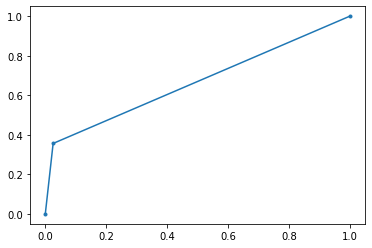

In [ ]:
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='Logistic')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      7453
         1.0       0.81      0.36      0.50      2342

    accuracy                           0.83      9795
   macro avg       0.82      0.67      0.70      9795
weighted avg       0.82      0.83      0.80      9795



In [ ]:
print(confusion_matrix(labels,predictions))

[[7261  192]
 [1507  835]]


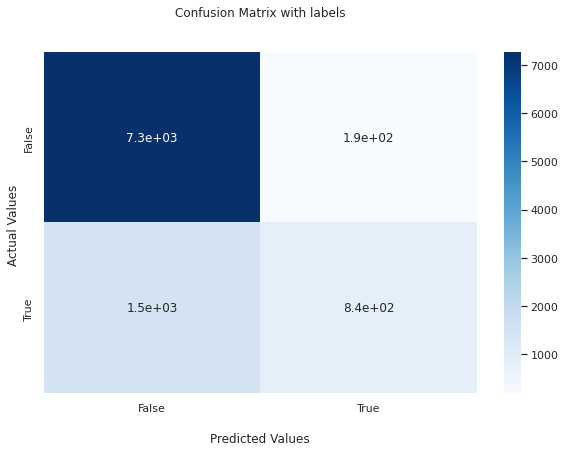

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(9.7,6.27)})

ax = sns.heatmap(confusion_matrix(labels,predictions), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
pyplot.show()